Download Dataset from Kaggle

In [1]:
!mkdir -p ~/.kaggle

In [2]:
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:04<00:00, 234MB/s]
100% 1.06G/1.06G [00:04<00:00, 256MB/s]


In [4]:
import zipfile
z = zipfile.ZipFile("/content/dogs-vs-cats.zip")
z.extractall('/content')
z.close()

Import necessary libraries

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [6]:
#generators :  TensorFlow's image_dataset_from_directory function, which efficiently handles large image datasets by dividing them into batches. This process minimizes memory usage and is ideal for training deep learning models.
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode ="int",
    batch_size = 32, #Data is loaded in chunks (batch_size=32), reducing the strain on RAM.
    image_size = (256, 256) #Images are resized to (256, 256)
)


val_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred", #subfolders, where each subfolder's name represents a class label.
    label_mode ="int",
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#Normalization function process ensures that image pixel values are scaled to the range [0, 1]

def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process) #Applies the process function to each element in the dataset (images and labels).
validation_ds = val_ds.map(process)

#After mapping, the dataset will yield normalized images with their corresponding labels.

In [8]:
#Create CNN Model

model = Sequential()

#cnn layer 1
model.add(Conv2D
          (
              32, #filters # Number of filters (learns 32 feature maps)
              kernel_size = (3,3),  # Size of the filter (3x3)
              padding = "valid",    # No padding; reduces dimensions
              activation = 'relu',  # Activation function: ReLU to introduce non-linearity
              input_shape = (256, 256, 3) # Input image size (256x256 RGB image)
          )),
model.add(BatchNormalization())
model.add(MaxPooling2D
          (
              pool_size = (2,2), # Size of the pooling window (2x2)
              strides = 2,    # Steps to move the window; halves the dimensions
              padding = 'valid' # No padding applied
          ))

#cnn layer 2
model.add(Conv2D
          (
              64, # No padding applied
              kernel_size = (3,3),  #Filter size remains 3x3
              padding = "valid",  #No padding; reduces dimensions further
              activation = 'relu',
              input_shape = (256, 256, 3)  # ReLU activation
          ))
model.add(BatchNormalization())
model.add(MaxPooling2D
          (
              pool_size = (2,2),
              strides = 2,
              padding = 'valid'
          ))

#cnn layer 3
model.add(Conv2D
          (
              128, ## Number of filters increased to 128
              kernel_size = (3,3),
              padding = "valid",
              activation = 'relu',

          )),
model.add(BatchNormalization())
model.add(MaxPooling2D
          (
              pool_size = (2,2),
              strides = 2,
              padding = 'valid'
          )),

#flatten layer
model.add(Flatten()), #Flattens the 3D feature maps into a 1D vector for input to Dense layers


#fully connected Layer or Dense layer
model.add(Dense(128, activation = "relu")), # First dense layer with 128 neurons and ReLU activation
model.add(Dropout(0.1))
model.add(Dense(64, activation = "relu")),  # Second dense layer with 64 neurons and ReLU activation
model.add(Dropout(0.1))

#output layer
model.add(Dense(1, activation = "sigmoid")) # Output layer with 1 neuron and sigmoid activation for binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [11]:
history = model.fit(train_ds, epochs = 10, validation_data = val_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 92ms/step - accuracy: 0.5459 - loss: 2.7892 - val_accuracy: 0.4994 - val_loss: 38.3452
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6396 - loss: 0.6417 - val_accuracy: 0.5000 - val_loss: 0.7632
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.6822 - loss: 0.5962 - val_accuracy: 0.6426 - val_loss: 21.4596
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.7407 - loss: 0.4960 - val_accuracy: 0.6620 - val_loss: 53.7390
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7765 - loss: 0.4250 - val_accuracy: 0.6590 - val_loss: 35.6574
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.8044 - loss: 0.3792 - val_accuracy: 0.6634 - val_loss: 96.5780
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.8379 - loss: 0.3387 - val_accuracy: 0.7266 - val_loss: 110.8820
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8616 - loss: 0.

Visualization

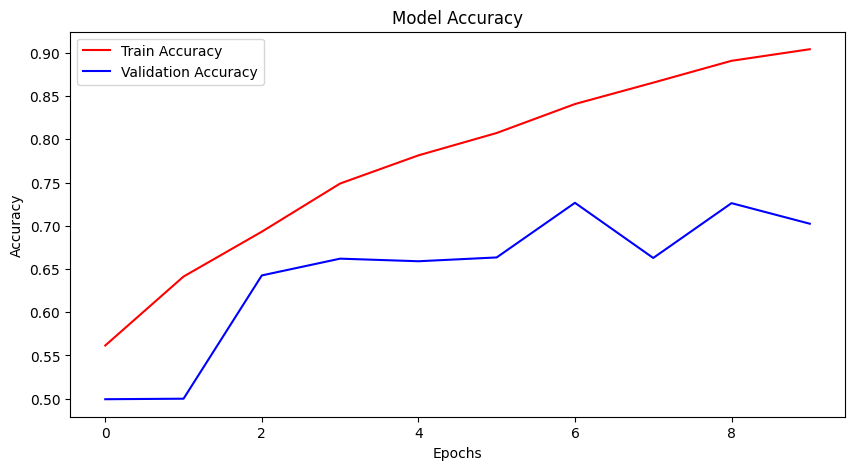

In [12]:
import matplotlib.pyplot as plt
# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], color="red", label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color="blue", label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

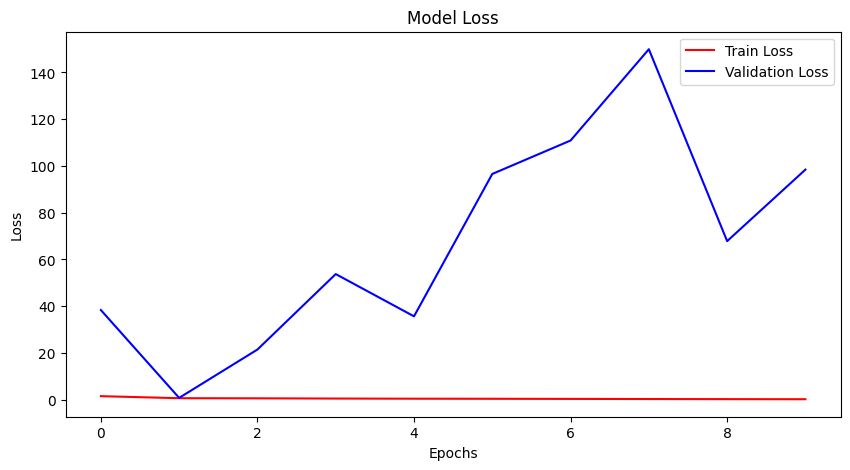

In [13]:
# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], color="red", label='Train Loss')
plt.plot(history.history['val_loss'], color="blue", label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Prediction

In [14]:
import cv2


In [49]:
test_img1 = cv2.imread('/content/train/dogs/dog.10020.jpg')

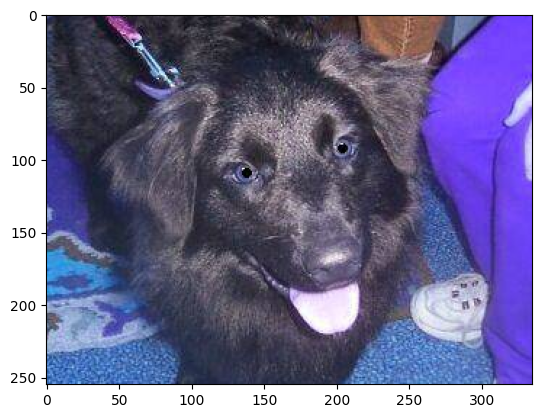

In [50]:

plt.imshow(test_img1)

In [51]:
test_img1.shape

(255, 335, 3)

In [52]:
test_img1 = cv2.resize(test_img1, (256, 256))

In [53]:
test_input1 = test_img1.reshape(1, 256, 256, 3)

In [54]:
model.predict(test_input1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[1.]], dtype=float32)

In [29]:
test_img = cv2.imread('/content/cat.jfif')

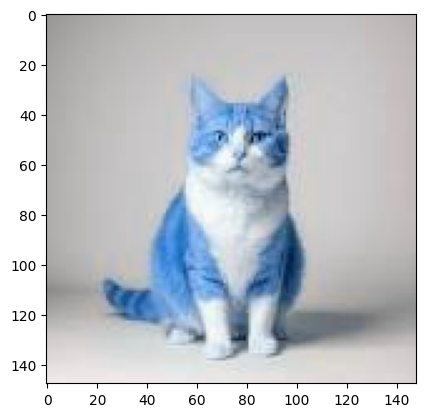

In [30]:

plt.imshow(test_img)

In [31]:
test_img.shape

(148, 148, 3)

In [32]:
test_img = cv2.resize(test_img, (256, 256))

In [33]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.]], dtype=float32)